In [1]:
# connecting drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# installing requirements
!pip install imageio==2.19.3
!pip install opencv-python==4.6.0.66
!pip install tensorboardX==2.2
!pip install einops==0.4.1
!pip install scikit-learn==1.1.1
!pip install matplotlib==3.5.1
!pip install protobuf==3.20.0
!pip install fire==0.4.0
!pip install moviepy==1.0.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 5.2 MB/s 
     |████████████████████████████████| 3.2 MB 57.9 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikit-learn==1.1.1 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0b1, 0.15.0b2, 0.15.0, 0.15.1, 0.15.2, 0.16b1, 0.16.0, 0.16.1, 0.17b1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19b2, 0.19.0, 0.19.1, 0.19.2, 0.20rc1, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21rc2, 0.21.0, 0.21.1, 0.21.2, 0.21.3, 0.22rc2.post1, 0.22rc3, 0.22, 0.22.1, 0.22.2, 0.22.2.post1, 0.23.0rc1, 0.23.0, 0.23.1, 0.23.2, 0.24.dev0, 0.24.0rc1, 0.24.0, 0.24.1, 0.24.2, 1.0rc1, 1.0rc2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.8 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
googleapis-common-protos 1.57.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-translate 3.8.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.9 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=8aa7c8737f4a196495279a310a4c29dd70883f89f49c276eb93578f8e4e36425
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 388 kB 5.0 MB/s 
     |████████████████████████████████| 26.9 MB 1.2 MB/s 
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110742 sha256=ce4fc7cab287796afddc5cd27cb444e0a34d3f3a9061f06518cfedb381fea5bc
  Stored in directory: /root/.cache/pip/wheels/56/dc/2b/9cd600d483c04af3353d66623056fc03faed76b7518faae4df
Successfully built moviepy
  Attempting uninstall: moviepy
    Found existing installatio

In [1]:
import sys
sys.path.append('/content/drive/My Drive/drive_folder/pips/')
import time
import numpy as np
import io
import os
from PIL import Image
import cv2
import saverloader
from nets.pips import Pips
import utils.improc
import random
import glob
from utils.basic import print_, print_stats
import torch
from tensorboardX import SummaryWriter
import torch.nn.functional as F
import matplotlib.pyplot as plt
import gc
import imageio.v2 as imageio

# save numpy array as npz file
from numpy import asarray
from numpy import savez_compressed

In [2]:
# specify the name of the data folder
data_dir = "frames_small"

In [5]:
# unziping frames into data folder
!unzip -d "$data_dir"/ /content/drive/MyDrive/"$data_dir".zip

Streaming output truncated to the last 5000 lines.
  inflating: frames_small/content/frames/Tai chi陈式太极拳五十六式-vB8XTJfV4rY/frames/frame_03207.jpg  
  inflating: frames_small/content/frames/Tai chi陈式太极拳五十六式-vB8XTJfV4rY/frames/frame_04704.jpg  
  inflating: frames_small/content/frames/Tai chi陈式太极拳五十六式-vB8XTJfV4rY/frames/frame_02405.jpg  
  inflating: frames_small/content/frames/Tai chi陈式太极拳五十六式-vB8XTJfV4rY/frames/frame_01260.jpg  
 extracting: frames_small/content/frames/Tai chi陈式太极拳五十六式-vB8XTJfV4rY/frames/frame_07295.jpg  
  inflating: frames_small/content/frames/Tai chi陈式太极拳五十六式-vB8XTJfV4rY/frames/frame_03342.jpg  
  inflating: frames_small/content/frames/Tai chi陈式太极拳五十六式-vB8XTJfV4rY/frames/frame_01198.jpg  
 extracting: frames_small/content/frames/Tai chi陈式太极拳五十六式-vB8XTJfV4rY/frames/frame_03594.jpg  
  inflating: frames_small/content/frames/Tai chi陈式太极拳五十六式-vB8XTJfV4rY/frames/frame_06860.jpg  
  inflating: frames_small/content/frames/Tai chi陈式太极拳五十六式-vB8XTJfV4rY/frames/frame_05508.jpg  

In [3]:
#create a folder to store training data in
!mkdir training_data

mkdir: cannot create directory ‘training_data’: File exists


In [7]:
# downloading their reference model
!bash /content/drive/MyDrive/drive_folder/pips/get_reference_model.sh

downloading the model from dropbox...
--2022-11-24 18:33:01--  https://www.dropbox.com/s/hbo7ns4vfx1sejp/reference_model.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/hbo7ns4vfx1sejp/reference_model.tar.gz [following]
--2022-11-24 18:33:01--  https://www.dropbox.com/s/raw/hbo7ns4vfx1sejp/reference_model.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc45dd7c69ba13c3b27bd7367905.dl.dropboxusercontent.com/cd/0/inline/BxZUaIsornxj1mEGGUTt4gSPTxd5V22CDZoLpVrMIVtx7ZrWjh1asnoCkhdjoweYoH6ghLOt2ZaLlTnUvhp-UGUIChrSEVDp4nis-6oO4DexzL_qdJbz-HdYpy1lBcqfHM_mliBL21ZnrTfk1VQzVjbi5NqsadILE9X7jt4qBorsiQ/file# [following]
--2022-11-24 18:33:02--  https://uc45dd7c69ba13c3b27bd7367905.dl.dropboxusercontent.com/cd/0/inline/BxZUaIsornxj

In [4]:
def create_model(model_weights):
  model = Pips(stride=4).cuda()
  parameters = list(model.parameters())
  _ = saverloader.load(model_weights, model)
  global_step = 0
  model.eval()
  return model


def run_model(model, rgbs, N, split):
    rgbs = rgbs.cuda().float() # B, S, C, H, W

    B, S, C, H, W = rgbs.shape
    rgbs_ = rgbs.reshape(B*S, C, H, W)
    H_, W_ = 360, 640
    rgbs_ = F.interpolate(rgbs_, (H_, W_), mode='bilinear')
    H, W = H_, W_
    rgbs = rgbs_.reshape(B, S, C, H, W)

    # pick N points to track; we'll use a uniform grid
    N_ = np.sqrt(N).round().astype(np.int32)
    grid_y, grid_x = utils.basic.meshgrid2d(B, N_, N_, stack=False, norm=False, device='cuda')
    grid_y = 8 + grid_y.reshape(B, -1)/float(N_-1) * (H-16)
    grid_x = 8 + grid_x.reshape(B, -1)/float(N_-1) * (W-16)
    xy = torch.stack([grid_x, grid_y], dim=-1) # B, N_*N_, 2
    _, S, C, H, W = rgbs.shape

    print_stats('rgbs', rgbs)

    # splitting grid of points into tensors of size 1500 along dim=1
    if split:
       xy_split = torch.split(xy, 1500, dim=1)
       preds_split = []

      # for each splitted point compute trajs
       for i in range(len(xy_split)):      
         preds, preds_anim, vis_e, stats = model(xy_split[i], rgbs, iters=6)
         preds_split.append(preds[-1])

       # put trajs back together
       trajs_e = torch.cat(preds_split, 2)
       

    else:
      preds, preds_anim, vis_e, stats = model(xy, rgbs, iters=6)
      # preds is a list of torch tensors 
      trajs_e = preds[-1] # tensor of shape (no.frames, no.tracking points, 2)
    print_stats('trajs_e', trajs_e)

    # return vis?? as well
    return trajs_e

def generate_training_data(pips_model, video_name, n, split):

    model = pips_model
    ## choose hyps
    B = 1
    S = 8
    N = n**2 # number of points to track

    # get frames of a file
    filenames = glob.glob(data_dir+'/content/frames/'+video_name+'/frames/frame_001*.jpg')
    filenames = sorted(filenames)
    max_iters = len(filenames)//S # run each unique subsequence

    global_step = 0

    # empty array to store training data
    a = np.empty([1,2])

    # run model each of 8 frames
    while global_step < 12:
        global_step += 1
        print("step",global_step,"out of",max_iters)

        try:
            rgbs = []
            for s in range(S):
                fn = filenames[(global_step-1)*S+s]
                if s==0:
                    print('start frame', fn)
                im = imageio.imread(fn)
                im = im.astype(np.uint8)
                rgbs.append(torch.from_numpy(im).permute(2,0,1))
            rgbs = torch.stack(rgbs, dim=0).unsqueeze(0) # 1, S, C, H, W

            with torch.no_grad():
                trajs_e = run_model(model, rgbs, N, split)

            # store training_img (frame 1 and 8) and trajs_e
            rgb_array1 = rgbs[0][0].permute(1, 2, 0).numpy() # from tensor to numpy array
            rgb_array8 = rgbs[0][-1].permute(1, 2, 0).numpy() # from tensor to numpy array
            training_img1 = cv2.resize(rgb_array1 , (240, 120)) # resizing image
            training_img8 = cv2.resize(rgb_array8 , (240, 120)) # resizing image
            trajs_array = trajs_e.cpu().numpy()

            # store training data
            if global_step ==1:
              a = np.array([(training_img1, training_img8, trajs_array[0][-1])], dtype=object)
            else:
              a = np.append(a, [(training_img1, training_img8, trajs_array[0][-1])],axis = 0)

        except FileNotFoundError as e:
            print('error', e)

    # save traning data to npz file
    savez_compressed("training_data/"+video_name+'.npz', a)

In [5]:
model = create_model('reference_model')

reading ckpt from reference_model
...found checkpoint reference_model/model-000100000.pth


In [11]:
# create a list of file names to go through
videos_list = [f for f in os.listdir('frames_small/content/frames/') if not f.startswith('.')]
print(videos_list)

['Tai chiYang Family Tai Chi q&a Knee Brush-WPeVwAhTNuU', 'Tai chi10 forms 2009-KX-dEeB47sc', 'Tai chiRen Guang Yi - Chen Style Taiji silk reeling part II-Wh3AmDsdQtM', 'Tai chiShaolin Basics Are From Theater!-gyms4lomW50', 'Tai chiWee Kee Jin - Keeping Your Structure-7jn9jeAbChE', 'Tai chi陈式太极拳五十六式-vB8XTJfV4rY', 'Tai chi56式夕陽美功夫扇-uOw-z7CR7x8', 'Tai chiCurso Chi Kung de los Seis Sonidos Curativos-PvjYVsRK4Dg', 'Tai chiCanda - Tai Chi Chuan Yang-Stil - Sanfte Bewegungsformen für Einsteiger-f7NkWPgh1-o', 'Tai chi熊門楊家太極拳111式第一段\u3000李國光老師示範-X_9SJZuSWQU']


In [ ]:
# iterate through the videos list and generate training data files
for x in range(len(videos_list)):
  print("Now generating training data for {}, {} out of {}.".format(videos_list[x], x, len(videos_list)))
  generate_training_data(model, videos_list[x], 100, split=True)

In [6]:
generate_training_data(model, 'Tai chiRen Guang Yi - Chen Style Taiji silk reeling part II-Wh3AmDsdQtM', n=100, split=True)

step 1 out of 12
start frame frames_small/content/frames/Tai chiRen Guang Yi - Chen Style Taiji silk reeling part II-Wh3AmDsdQtM/frames/frame_00100.jpg
rgbs (float32) min = 0.00, mean = 101.33, max = 255.00 torch.Size([1, 8, 3, 360, 640])
trajs_e (float32) min = 3.70, mean = 249.84, max = 632.83 torch.Size([1, 8, 10000, 2])
step 2 out of 12
start frame frames_small/content/frames/Tai chiRen Guang Yi - Chen Style Taiji silk reeling part II-Wh3AmDsdQtM/frames/frame_00108.jpg
rgbs (float32) min = 0.00, mean = 101.09, max = 255.00 torch.Size([1, 8, 3, 360, 640])
trajs_e (float32) min = 6.65, mean = 249.83, max = 632.52 torch.Size([1, 8, 10000, 2])
step 3 out of 12
start frame frames_small/content/frames/Tai chiRen Guang Yi - Chen Style Taiji silk reeling part II-Wh3AmDsdQtM/frames/frame_00116.jpg
rgbs (float32) min = 0.00, mean = 100.95, max = 255.00 torch.Size([1, 8, 3, 360, 640])


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


trajs_e (float32) min = 3.11, mean = 249.89, max = 632.57 torch.Size([1, 8, 10000, 2])
step 4 out of 12
start frame frames_small/content/frames/Tai chiRen Guang Yi - Chen Style Taiji silk reeling part II-Wh3AmDsdQtM/frames/frame_00124.jpg
rgbs (float32) min = 0.00, mean = 100.77, max = 255.00 torch.Size([1, 8, 3, 360, 640])
trajs_e (float32) min = 5.17, mean = 249.81, max = 632.58 torch.Size([1, 8, 10000, 2])
step 5 out of 12
start frame frames_small/content/frames/Tai chiRen Guang Yi - Chen Style Taiji silk reeling part II-Wh3AmDsdQtM/frames/frame_00132.jpg
rgbs (float32) min = 0.00, mean = 100.65, max = 255.00 torch.Size([1, 8, 3, 360, 640])
trajs_e (float32) min = 4.51, mean = 249.64, max = 633.00 torch.Size([1, 8, 10000, 2])
step 6 out of 12
start frame frames_small/content/frames/Tai chiRen Guang Yi - Chen Style Taiji silk reeling part II-Wh3AmDsdQtM/frames/frame_00140.jpg
rgbs (float32) min = 0.00, mean = 100.40, max = 255.00 torch.Size([1, 8, 3, 360, 640])
trajs_e (float32) min 

In [8]:
# zip all numpy files
!zip -r /content/test_training_data.zip /content/training_data
# cp NumPy zip file into drive
!cp test_training_data.zip /content/drive/MyDrive/

  adding: content/training_data/ (stored 0%)
  adding: content/training_data/Tai chiRen Guang Yi - Chen Style Taiji silk reeling part II-Wh3AmDsdQtM.npz (deflated 0%)


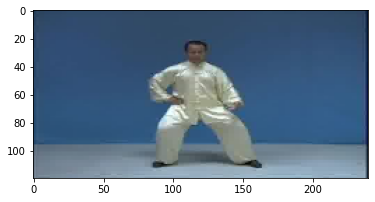

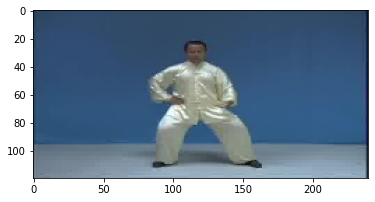

[[  8.868045   10.59803  ]
 [ 14.706223   10.064602 ]
 [ 20.622593    9.738971 ]
 [ 30.442312    9.624727 ]
 [ 42.851955    9.715109 ]
 [ 48.14672     9.559917 ]
 [ 51.137634    9.308643 ]
 [ 57.83318     9.082726 ]
 [ 63.37681     9.05343  ]
 [ 68.08458     8.8974   ]
 [ 72.75585     8.727876 ]
 [ 77.92091     8.578353 ]
 [ 85.22489     8.449889 ]
 [ 91.08412     8.174015 ]
 [100.14732     8.197188 ]
 [106.358635    8.233114 ]
 [114.32044     8.427988 ]
 [120.647484    8.623218 ]
 [121.133484    7.8405566]
 [125.12642     8.885098 ]
 [135.91757    10.795754 ]
 [148.64743    10.612419 ]
 [151.818       8.773394 ]
 [153.48645     8.861808 ]
 [155.64488     8.799521 ]
 [160.81137     7.965174 ]
 [167.11836     7.5140724]
 [175.51454     7.8901777]
 [182.1032      8.083685 ]
 [187.0298      8.28572  ]
 [192.94305     8.158041 ]
 [199.06146     8.212157 ]
 [203.05574     7.352089 ]
 [204.96375     5.728129 ]
 [220.93735     6.543451 ]
 [227.41716     7.8366756]
 [233.92982     7.3385544]
 

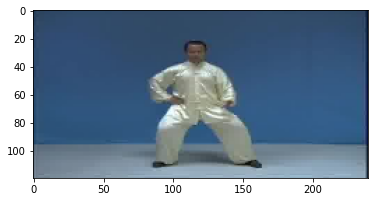

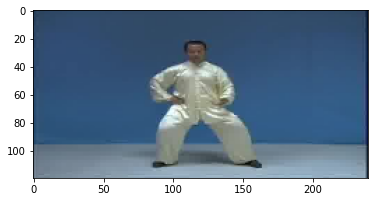

[[  7.866538    7.6499667]
 [ 14.447913    8.365406 ]
 [ 20.083677    8.181528 ]
 [ 26.952566    8.736731 ]
 [ 32.649433    9.595448 ]
 [ 39.221558    8.640299 ]
 [ 45.969368    8.451372 ]
 [ 52.243034    8.306282 ]
 [ 59.028904    8.409954 ]
 [ 64.9499      8.204784 ]
 [ 70.73525     8.026216 ]
 [ 76.46369     7.9990735]
 [ 84.11957     8.170852 ]
 [ 89.96781     8.010046 ]
 [ 95.42896     8.109293 ]
 [100.24908     8.206177 ]
 [104.52082     8.481786 ]
 [109.69721     8.860325 ]
 [115.25366     9.099622 ]
 [121.22884     9.122708 ]
 [123.479324    8.299796 ]
 [140.09787     8.934033 ]
 [147.27798     8.038758 ]
 [152.36089     8.234056 ]
 [157.76843     8.758336 ]
 [163.63518     8.469351 ]
 [169.68782     8.377254 ]
 [176.84398     8.284068 ]
 [182.44342     8.172756 ]
 [186.94414     8.278628 ]
 [192.20825     8.1106205]
 [197.68839     8.258891 ]
 [201.76022     8.139284 ]
 [203.41663     6.8939896]
 [215.82794     6.655445 ]
 [224.87282     7.3267465]
 [230.32631     7.2429204]
 

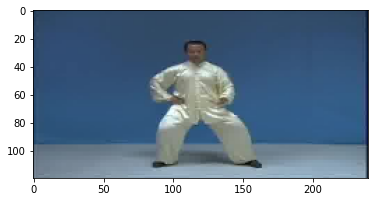

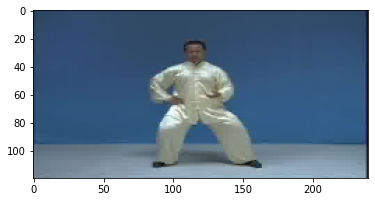

[[  8.536278    8.21286  ]
 [ 14.527968    9.563614 ]
 [ 19.890795    9.073047 ]
 [ 26.0328      7.0536423]
 [ 33.753365    7.54737  ]
 [ 37.79402     8.023675 ]
 [ 44.815353    7.6520586]
 [ 51.914284    7.9298563]
 [ 59.619614    8.662009 ]
 [ 64.081696    8.059851 ]
 [ 69.77562     7.9798656]
 [ 74.7533      8.366847 ]
 [ 82.17514     8.764324 ]
 [ 88.21854     8.682373 ]
 [ 93.902596    8.546518 ]
 [101.76028     8.480865 ]
 [109.51876     8.42188  ]
 [115.58008     8.535756 ]
 [122.823006    9.15025  ]
 [128.48038    10.202972 ]
 [135.29666    10.678819 ]
 [141.76756     9.79737  ]
 [149.69194     8.947282 ]
 [155.64732     8.619899 ]
 [162.45004     9.026208 ]
 [166.714       8.894907 ]
 [170.2118      7.5160303]
 [175.50092     6.475947 ]
 [181.04237     5.76869  ]
 [187.45203     4.900336 ]
 [194.89764     4.3370132]
 [198.77155     3.3703597]
 [206.13834     3.107    ]
 [218.4058      3.5340202]
 [222.05708     6.0977807]
 [227.48723     6.5208387]
 [235.11255     6.6802588]
 

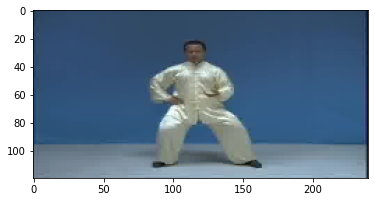

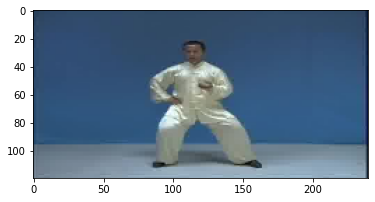

[[  8.892321    6.6912117]
 [ 15.9288645   9.669727 ]
 [ 20.900646    9.23186  ]
 [ 26.043394    8.301931 ]
 [ 34.509277    7.7774563]
 [ 40.81592     7.5570893]
 [ 46.81571     7.5178323]
 [ 54.076397    7.587723 ]
 [ 59.69366     7.312493 ]
 [ 65.00818     7.122083 ]
 [ 71.13245     7.6432533]
 [ 79.59993     8.410825 ]
 [ 84.927704    8.19448  ]
 [ 90.125496    8.203189 ]
 [ 96.49518     8.317848 ]
 [102.007675    8.325494 ]
 [105.901245    8.031325 ]
 [110.95759     7.662897 ]
 [124.701294    7.3563156]
 [131.75815     7.9025187]
 [131.16927     8.945251 ]
 [132.63002     9.231982 ]
 [134.37419     8.795547 ]
 [149.41281     5.1710925]
 [162.72127     5.8355556]
 [169.17337     6.5199275]
 [176.49971     6.117508 ]
 [181.16742     7.174148 ]
 [187.76292     7.8749795]
 [192.55827     7.7716684]
 [197.4489      7.5455003]
 [203.1479      7.3064857]
 [208.70375     7.1295385]
 [216.28658     7.653149 ]
 [221.47752     7.539987 ]
 [231.83311     8.39879  ]
 [238.25427     8.892213 ]
 

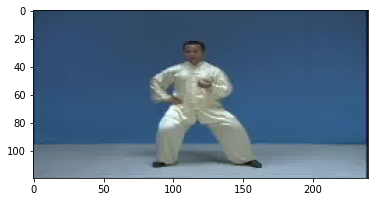

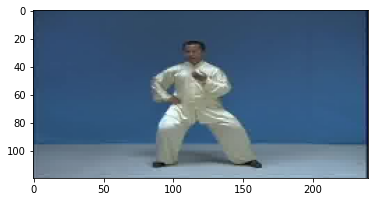

[[  6.391304    9.368573 ]
 [ 11.617568   10.940056 ]
 [ 21.02063     8.863329 ]
 [ 26.808987    7.0121584]
 [ 34.173756    7.523895 ]
 [ 39.692257    7.9564567]
 [ 45.913177    7.778103 ]
 [ 52.13559     7.4620986]
 [ 56.70257     7.493356 ]
 [ 64.277626    7.8095713]
 [ 71.022255    7.831855 ]
 [ 77.40688     7.9775295]
 [ 85.589836    8.738696 ]
 [ 91.89865     9.074218 ]
 [ 98.60743     9.226921 ]
 [102.973785    9.046553 ]
 [105.40694     8.174748 ]
 [109.19534     7.34986  ]
 [112.603806    6.875915 ]
 [114.929596    7.021397 ]
 [117.154045    7.7333703]
 [125.55956     7.4546475]
 [139.31723     7.2153053]
 [154.35028     4.826597 ]
 [160.72139     6.5659976]
 [164.13121     8.249885 ]
 [170.17473     7.8614745]
 [177.08055     7.3493166]
 [182.13145     7.192362 ]
 [186.7174      7.145338 ]
 [191.98654     6.863207 ]
 [196.26099     6.4587154]
 [199.50362     6.036732 ]
 [204.62909     5.1760983]
 [215.56686     4.506908 ]
 [223.22295     6.5343323]
 [228.93367     6.4781632]
 

In [7]:
# see training data of one video for verification
from numpy import load
np.set_printoptions(threshold=sys.maxsize)
data = load('training_data/Tai chiRen Guang Yi - Chen Style Taiji silk reeling part II-Wh3AmDsdQtM.npz', allow_pickle=True)
lst = data.files
for item in lst:
  for x in range(len(item)):
    plt.imshow(data[item][x][0])
    plt.show()
    plt.imshow(data[item][x][1])
    plt.show()
    print(data[item][x][2])